### EDA for AI_screening

In [152]:
import sys
from pathlib import Path

"""
Enabling src directory imports  
"""

Project_root = Path().resolve().parents[0]

print(Project_root)

sys.path.append(str(Project_root))



/Users/makelele/ml_projects/AI_screening


In [153]:
from src.data_ingestion import load_data

""" 
Loads data from Kaggle and returns the path
"""

path = load_data()
file_list = [] #list of filenames
for file in path.iterdir():
    if file.is_file() and file.suffix == ".csv":
        file_list.append(file)

print(file_list)

[PosixPath('/Users/makelele/ml_projects/AI_screening/data/raw/ai_resume_screening.csv')]


In [154]:
import pandas as pd

""" 
Reading the csv
"""
df = pd.read_csv(file_list[0])
df

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes
...,...,...,...,...,...,...,...
29995,9,77.4,Bachelors,13,691,434,Yes
29996,5,77.8,Bachelors,9,473,149,No
29997,1,64.6,Bachelors,7,247,82,No
29998,7,94.8,Bachelors,12,584,409,Yes


### Basic info

In [155]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_experience    30000 non-null  int64  
 1   skills_match_score  30000 non-null  float64
 2   education_level     30000 non-null  str    
 3   project_count       30000 non-null  int64  
 4   resume_length       30000 non-null  int64  
 5   github_activity     30000 non-null  int64  
 6   shortlisted         30000 non-null  str    
dtypes: float64(1), int64(4), str(2)
memory usage: 1.6 MB


### Shape

In [156]:
df.shape

(30000, 7)

### Columns

In [157]:
columns = pd.DataFrame(df.columns, columns=['columns'])
columns

,columns
0,years_experience
1,skills_match_score
2,education_level
3,project_count
4,resume_length
5,github_activity
6,shortlisted


In [158]:
df.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes


### Summary 

In [159]:
df.describe()

,years_experience,skills_match_score,project_count,resume_length,github_activity
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,7.506567,73.682653,10.646267,572.584700,325.260667
std,4.624104,16.765909,4.634047,178.709918,159.951803
min,0.000000,0.500000,0.000000,150.000000,0.000000
25%,3.750000,62.100000,7.000000,441.000000,202.000000
50%,7.000000,74.300000,10.000000,574.000000,321.000000
75%,12.000000,86.500000,14.000000,709.000000,443.000000
max,15.000000,100.000000,25.000000,900.000000,842.000000


### Cheking unique educations

In [160]:
education_list = df['education_level'].unique()
print(education_list)


<StringArray>
['Bachelors', 'Masters', 'High School', 'PhD']
Length: 4, dtype: str


### Checking class balance (label here is shortlisted)

In [161]:

label = df['shortlisted'].value_counts()
print(label)

normalize = df['shortlisted'].value_counts(normalize=True)
print(normalize)

shortlisted
Yes    20966
No      9034
Name: count, dtype: int64
shortlisted
Yes    0.698867
No     0.301133
Name: proportion, dtype: float64


### Visualizations

In [162]:
import seaborn 
import matplotlib.pyplot as plt 

def visualize_target():
    plt.figure(figsize=(10,5))
    seaborn.countplot(data=df, x = "shortlisted")
    plt.title("Target distribution")

def visualize_years():
    plt.figure(figsize=(10,5))
    seaborn.histplot(df['years_experience'], kde = True,bins=10)
    plt.title("Age distribution of the data")

def skills_match():
    plt.figure(figsize=(10,5))
    seaborn.histplot(df['skills_match_score'], bins=30, kde=True)
    plt.title("Distribution of skill scores")

def eductation_level():
    plt.figure(figsize=(10,5))
    seaborn.histplot(df['education_level'])
    plt.title("Distribution of education level")

def shortlisted_vs_skill():
    plt.figure(figsize=(10,5))
    seaborn.boxenplot(x = df['shortlisted'],y=df['skills_match_score'])
    plt.title("Skill scores across shortlisted")
    
def shortliste_vs_githubactivity():
    plt.figure(figsize=(10,5))
    seaborn.boxenplot(x = df['shortlisted'],y=df['github_activity'])
    plt.title("Comparison of Github activity")

def shortliste_vs_project():
    plt.figure(figsize=(10,5))
    seaborn.boxenplot(x = df['shortlisted'],y=df['project_count'])
    plt.title("Project count's impact on shortlisting")

def scatterplot_experience():
    plt.figure(figsize=(10,5))
    seaborn.scatterplot(x = df['years_experience'] , y = df['github_activity'], hue= df['shortlisted'])
    plt.title("Github activity vs experience with shortlisting")

def scatterplot_skill():
    plt.figure(figsize=(10,5))
    seaborn.scatterplot(x = df['resume_length'] , y = df['skills_match_score'], hue= df['shortlisted'])
    plt.title("Skill score vs length of the resume with shortlisting")

def education_skill_score():
    plt.figure(figsize=(10,5))
    seaborn.boxplot(x=df['education_level'],y=df['skills_match_score'])
    plt.title("Skill scores in educations")

def projecs_education():
    plt.figure(figsize=(10,5))
    seaborn.barplot(
        x='education_level',
        y='project_count',
        hue='shortlisted',
        estimator='mean',
        data=df)
    plt.title("Skill scores in educations")

def pair():
    seaborn.pairplot(data=df,hue='shortlisted',diag_kind='kde',palette='husl')
    plt.title("Heatmap")

def heatmap():
    """
    Need to convert strings to numerical values before using heatmaps -> mapping for education . 
    """
    df_temp = df.copy()
    mapping = {
        'High School': 0,
        'Bachelors': 1,
        'Masters': 2,
        'PhD': 3
    }
   
    df_temp['education_level'] = df_temp['education_level'].map(mapping)


    columns = ['years_experience', 'skills_match_score', 'education_level',
       'project_count', 'resume_length', 'github_activity']
    
    corr = df_temp[columns].corr()
    seaborn.heatmap(corr, cmap='Blues', annot=True)

### Visualize all

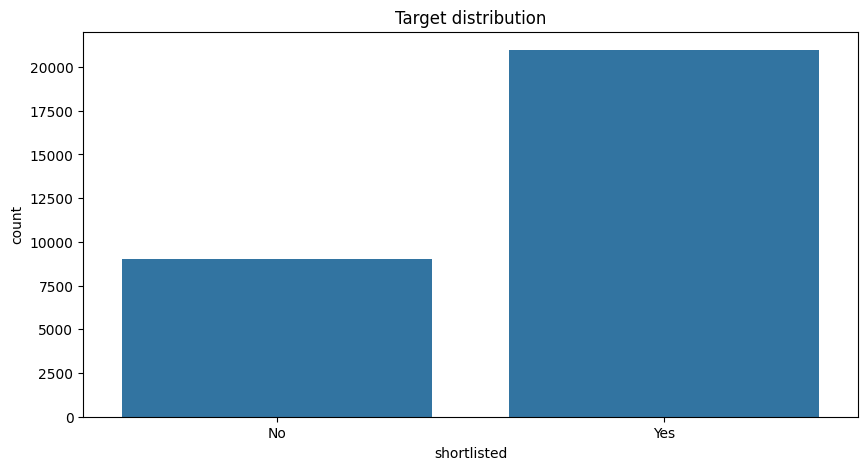

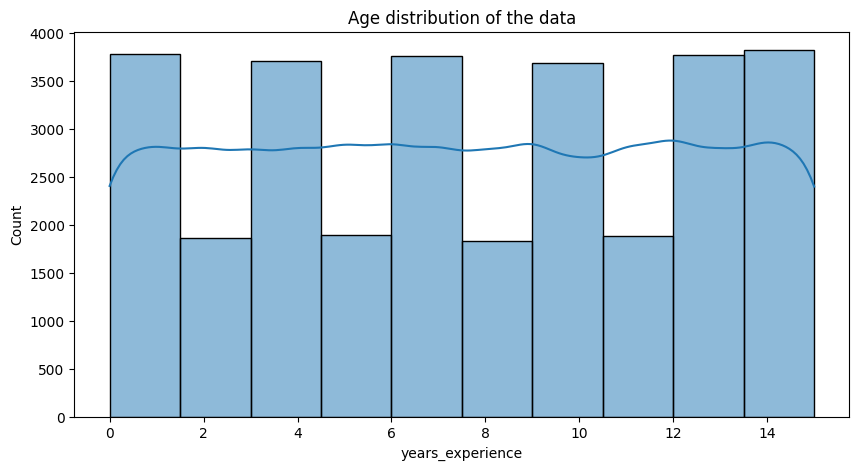

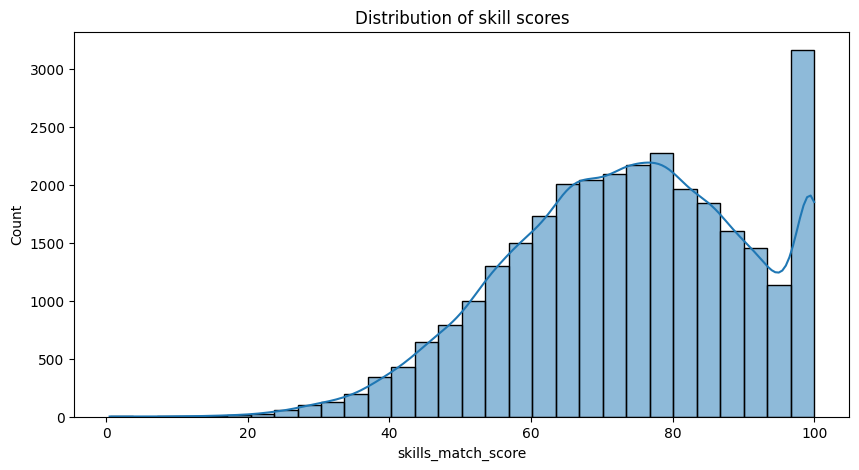

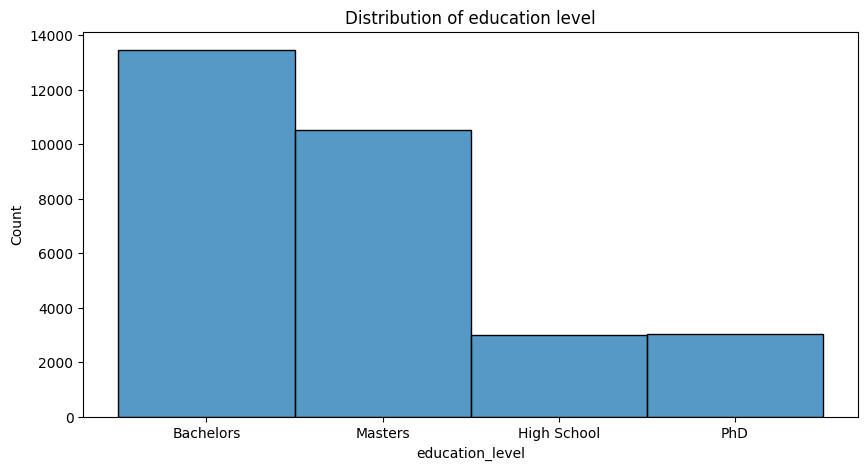

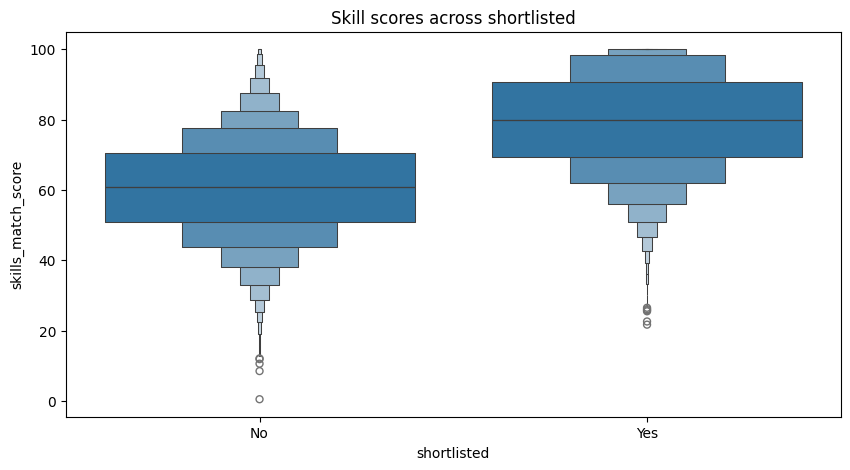

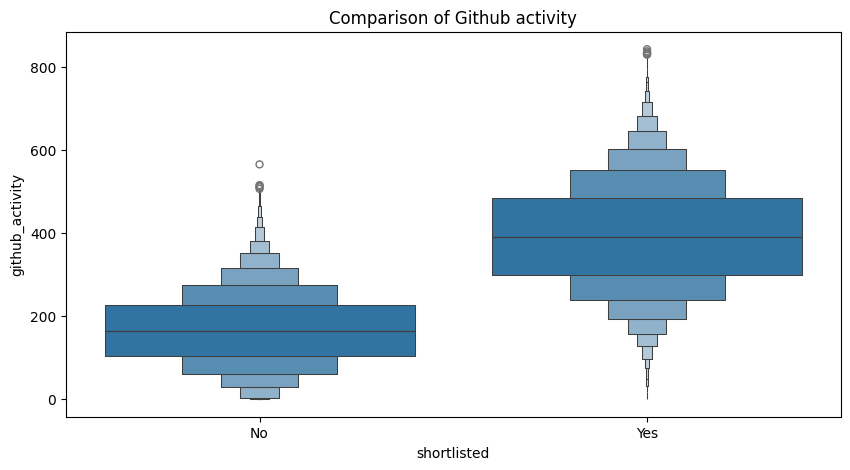

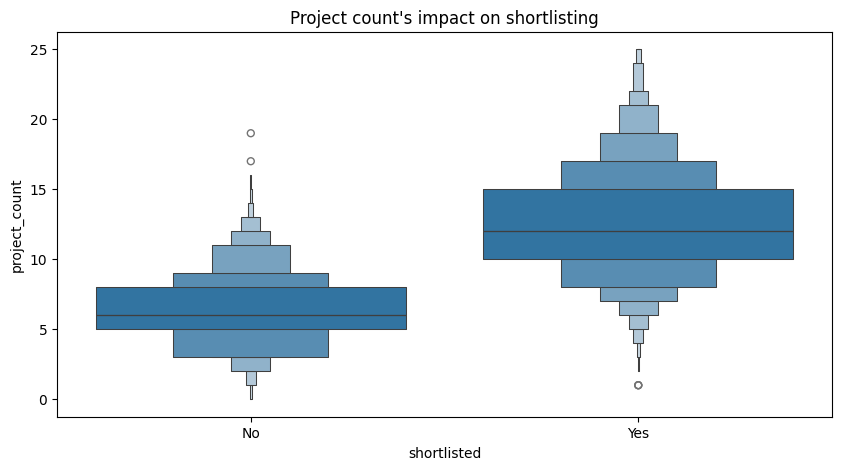

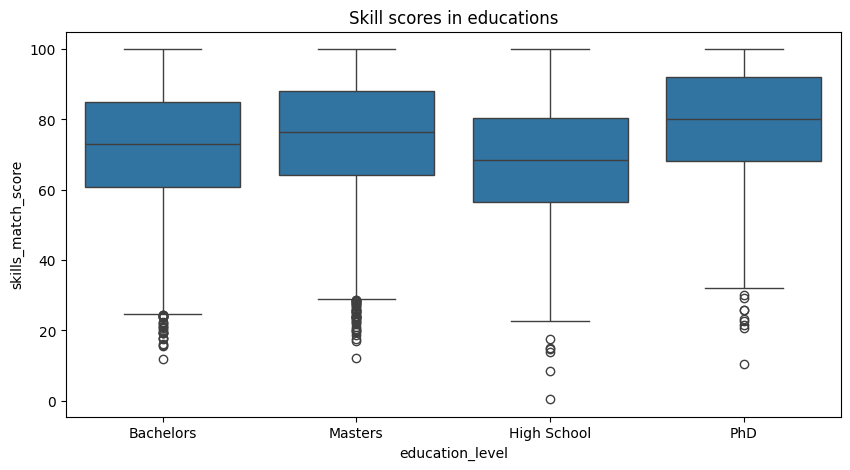

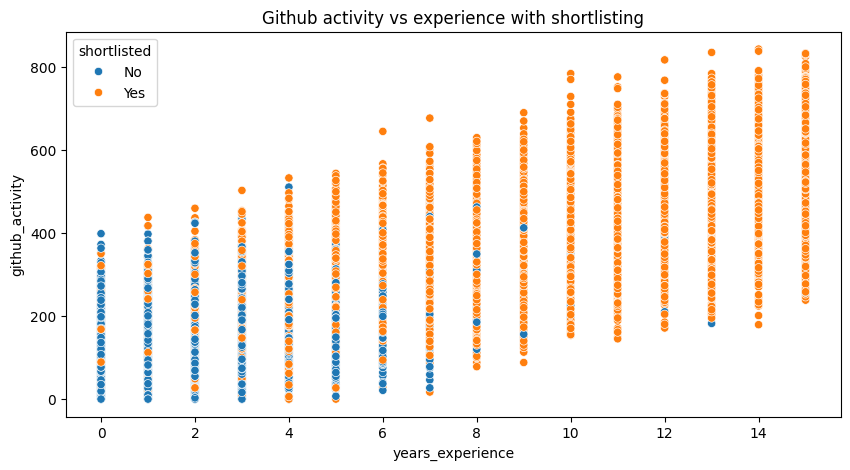

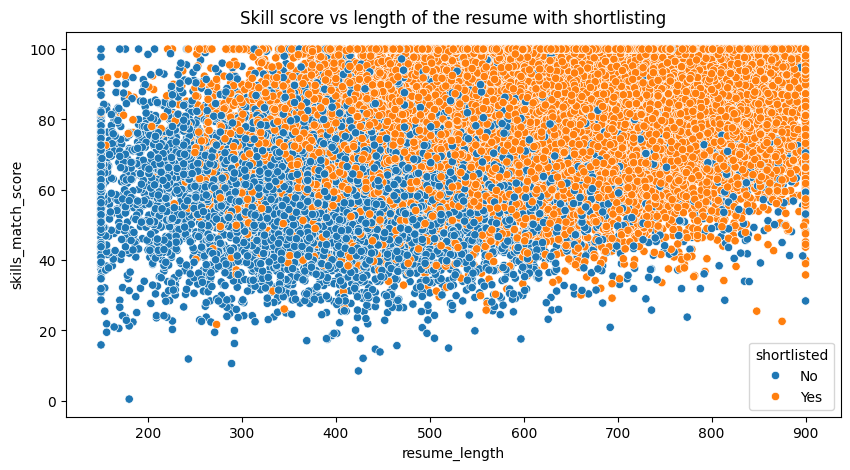

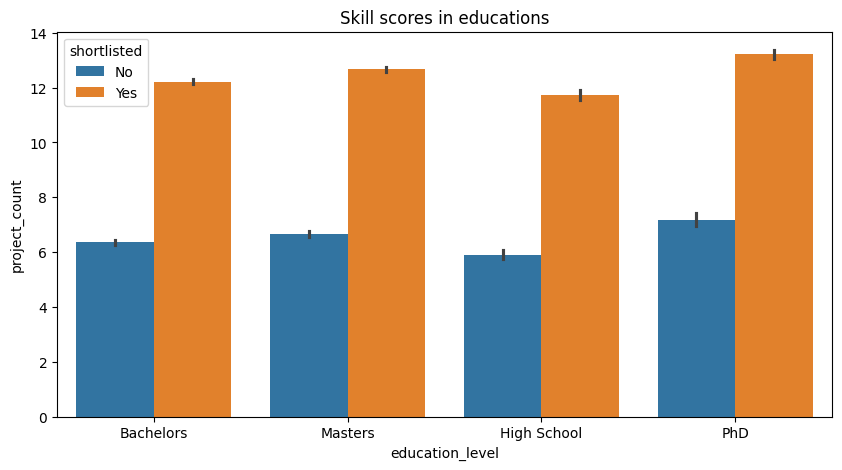

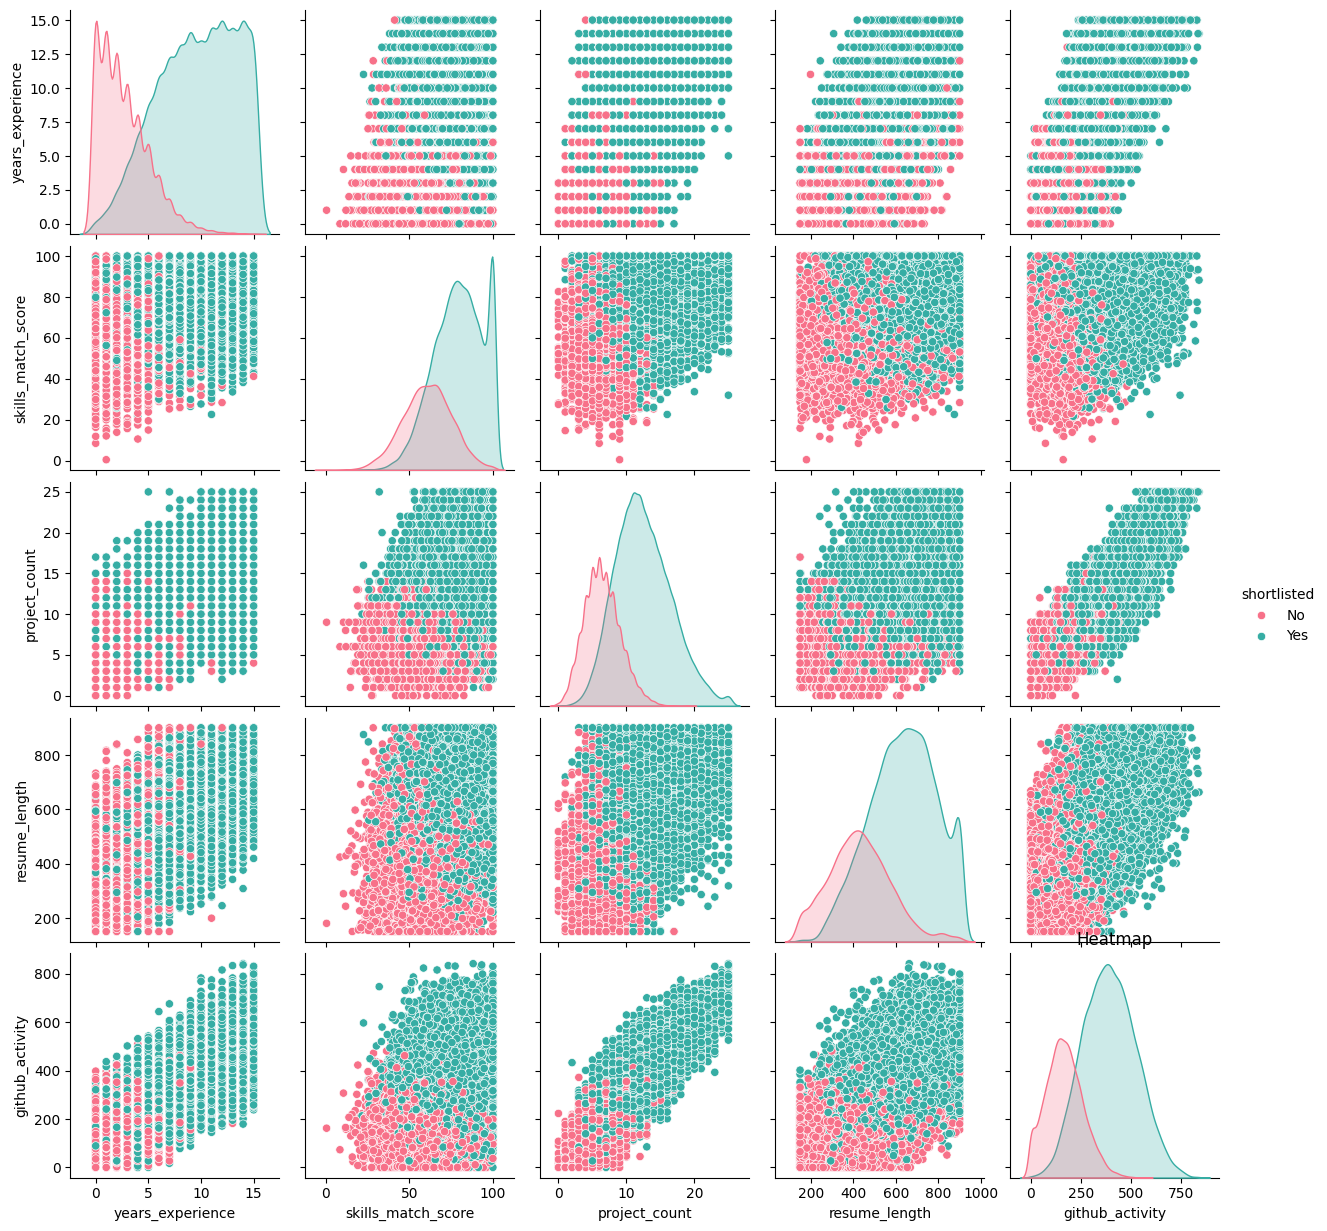

In [163]:
visualize_target()
visualize_years()
skills_match()
eductation_level()
shortlisted_vs_skill()
shortliste_vs_githubactivity()
shortliste_vs_project()
education_skill_score()
scatterplot_experience()
scatterplot_skill()
projecs_education()
pair()

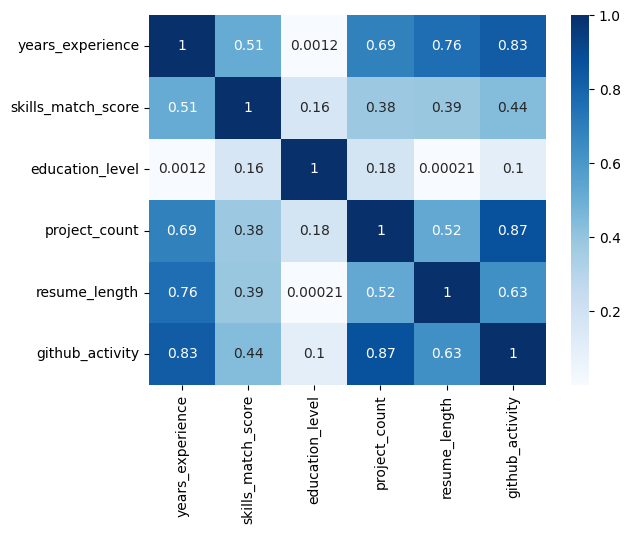

In [164]:
heatmap()

### Encode data

In [178]:

"""
Encoding strings to numerical values
"""
df = pd.read_csv(file_list[0])

mapping = {
        'High School': 0,
        'Bachelors': 1,
        'Masters': 2,
        'PhD': 3
    }

mapping_target = {
        'Yes': 1,
        'No': 0
    }


df['education_level'] = df['education_level'].map(mapping)
df['shortlisted'] = df['shortlisted'].map(mapping_target)

df.head()


,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,1,7,234,158,0
1,3,59.1,2,5,502,77,0
2,12,100.0,2,12,753,381,1
3,14,66.8,0,8,529,407,1
4,10,99.6,1,10,754,331,1


### VIF analysis

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [193]:
"""
Creating a feature df (dropping target from the df)
"""


Features = df.select_dtypes(include="number").copy()
if 'shortlisted' in Features.columns:
    Features = Features.drop(columns=['shortlisted'])

Features

""" 
To advance, we need to scale our features first since VIF is highly sensitive. Standardscaler normalizes the values. 
"""

scaler = StandardScaler()
scaled_df = scaler.fit_transform(Features) #Here the scaler normalizes the values
# this is numpy array of the normalized values meaning we need to create a new pandas df

scaled_df = pd.DataFrame(scaled_df, columns= Features.columns)


#Values are nicely scaled



vif_df = pd.DataFrame()
vif_df["feature"] = scaled_df.columns
vif_df["VIF"] = [
    variance_inflation_factor(scaled_df.values, i)
    for i in range(scaled_df.shape[1])
]
vif_df.sort_values("VIF", ascending=False)


,feature,VIF
5,github_activity,7.209325
0,years_experience,5.030481
3,project_count,4.438448
4,resume_length,2.366219
1,skills_match_score,1.409571
2,education_level,1.103307


### Simple baseline ML model 

In [197]:
X = df.select_dtypes(include='number').drop(columns=['shortlisted'])
Y = df['shortlisted']

In [202]:
from sklearn.model_selection import train_test_split

"""Stratify keeps the same ration of target values in both sets, 
here it is Yes roughly 0.7 and No 0.3"""

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

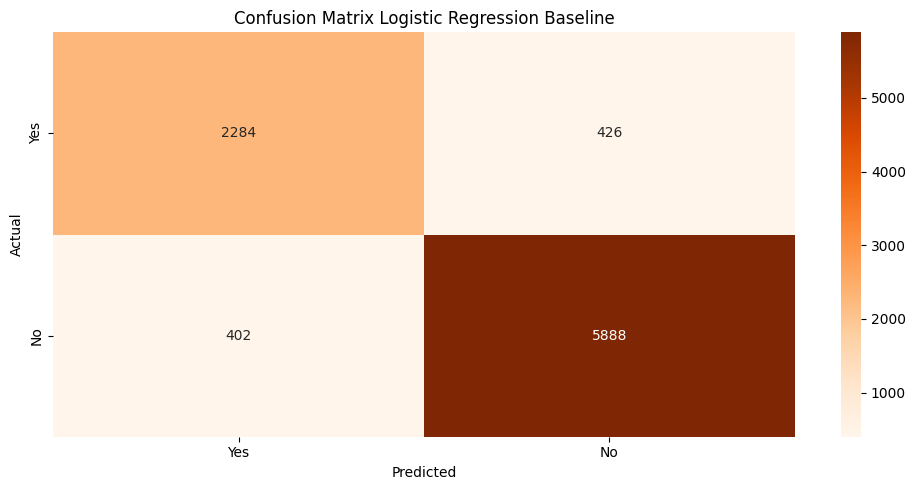

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter=1000)

trained_model = model.fit(X_train,y_train)

predictions = trained_model.predict(X_test)
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,5))
seaborn.heatmap(conf_matrix,
                xticklabels=['Yes', 'No'],
                yticklabels=['Yes', 'No'],
                cmap='Oranges', 
                annot=True, #True adds numerical values to plot
                fmt="d",  
                )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression Baseline")
plt.tight_layout()

# Define the figures directory
figures_dir = Path("figures")

# Create the directory if it doesn't exist
figures_dir.mkdir(parents=True, exist_ok=True)

# Save the figure
plt.savefig(figures_dir / "confusion_matrix.png", dpi=150)

plt.show()

### Report

In [218]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2710
           1       0.93      0.94      0.93      6290

    accuracy                           0.91      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.91      0.91      0.91      9000



['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',